In [2]:
%matplotlib inline
import pandas as pd
pd.read_csv("train.csv")

hoge


In [6]:
pd.read_csv("test.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


https://www.kaggle.com/c/titanic#evaluation
### Goal
生き残れるかどうかを予測する

train.csvにはsurvivedの項目がある
test.csvにはないので、これを埋めるような事をすればいいはず

```
PassengerId: 乗客のID
Survived: 生存(1)、死亡(0)
Pclass: 乗客の階級
Name: 乗客の名前
Sex: 性別
Age: 年齢
SibSp: タイタニック号に乗っていた兄弟、姉妹、義兄弟、義姉妹、夫、妻の数（自分を除く）
Parch: タイタニック号に乗っていた母親、父親、息子、娘の数
Ticket: チケットナンバー
Fare: 乗船料金
Cabin: キャビン番号
Embarked: 乗船場
```


https://qiita.com/suzumi/items/8ce18bc90c942663d1e6
このページを参考

In [9]:
df= pd.read_csv("train.csv").replace("male",0).replace("female",1)
df["Age"].fillna(df.Age.median(), inplace=True)

客室のグレート毎にヒストグラム出力

([array([  80.,   97.,  372.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

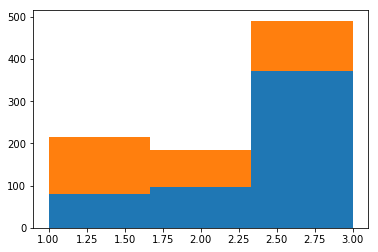

In [ ]:
import matplotlib.pyplot as plt
split_data = []
for survived in [0, 1]:
    split_data.append(df[df.Survived==survived])
    
temp = [i["Pclass"].dropna() for i in split_data] #df.dropna()は欠損値のある行を除く
plt.hist(temp, histtype="barstacked", bins=3)

([array([  13.,   13.,    8.,   63.,   80.,  191.,   47.,   39.,   30.,
           23.,   14.,   11.,   10.,    3.,    4.,    0.]),
  array([  44.,   20.,   19.,   96.,  122.,  285.,   88.,   67.,   47.,
           39.,   24.,   18.,   14.,    3.,    4.,    1.])],
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 2 Lists of Patches objects>)

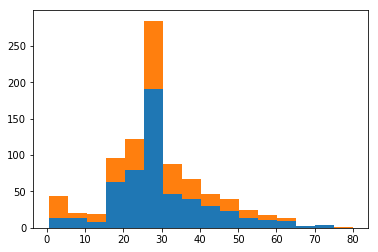

In [16]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

In [ ]:
df["FamiliySize"] = df["SlibSp"] + df["Parch"] + 1
df2 = df.drop()